In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [2]:
train_data =pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


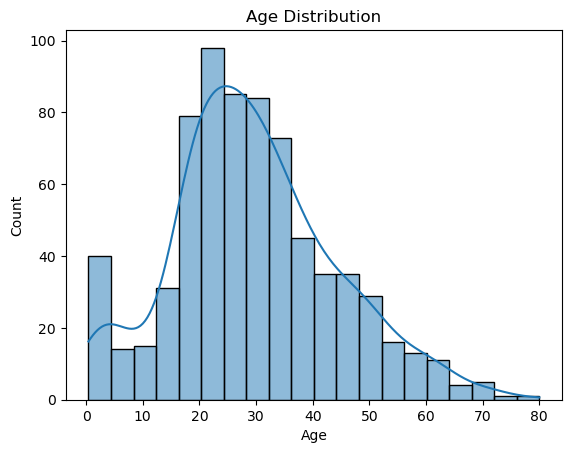

In [7]:
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

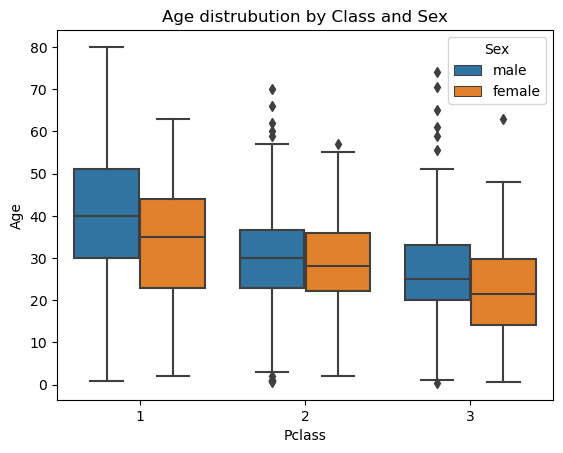

In [8]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train_data)
plt.title('Age distrubution by Class and Sex')
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Figure size 1500x1000 with 0 Axes>

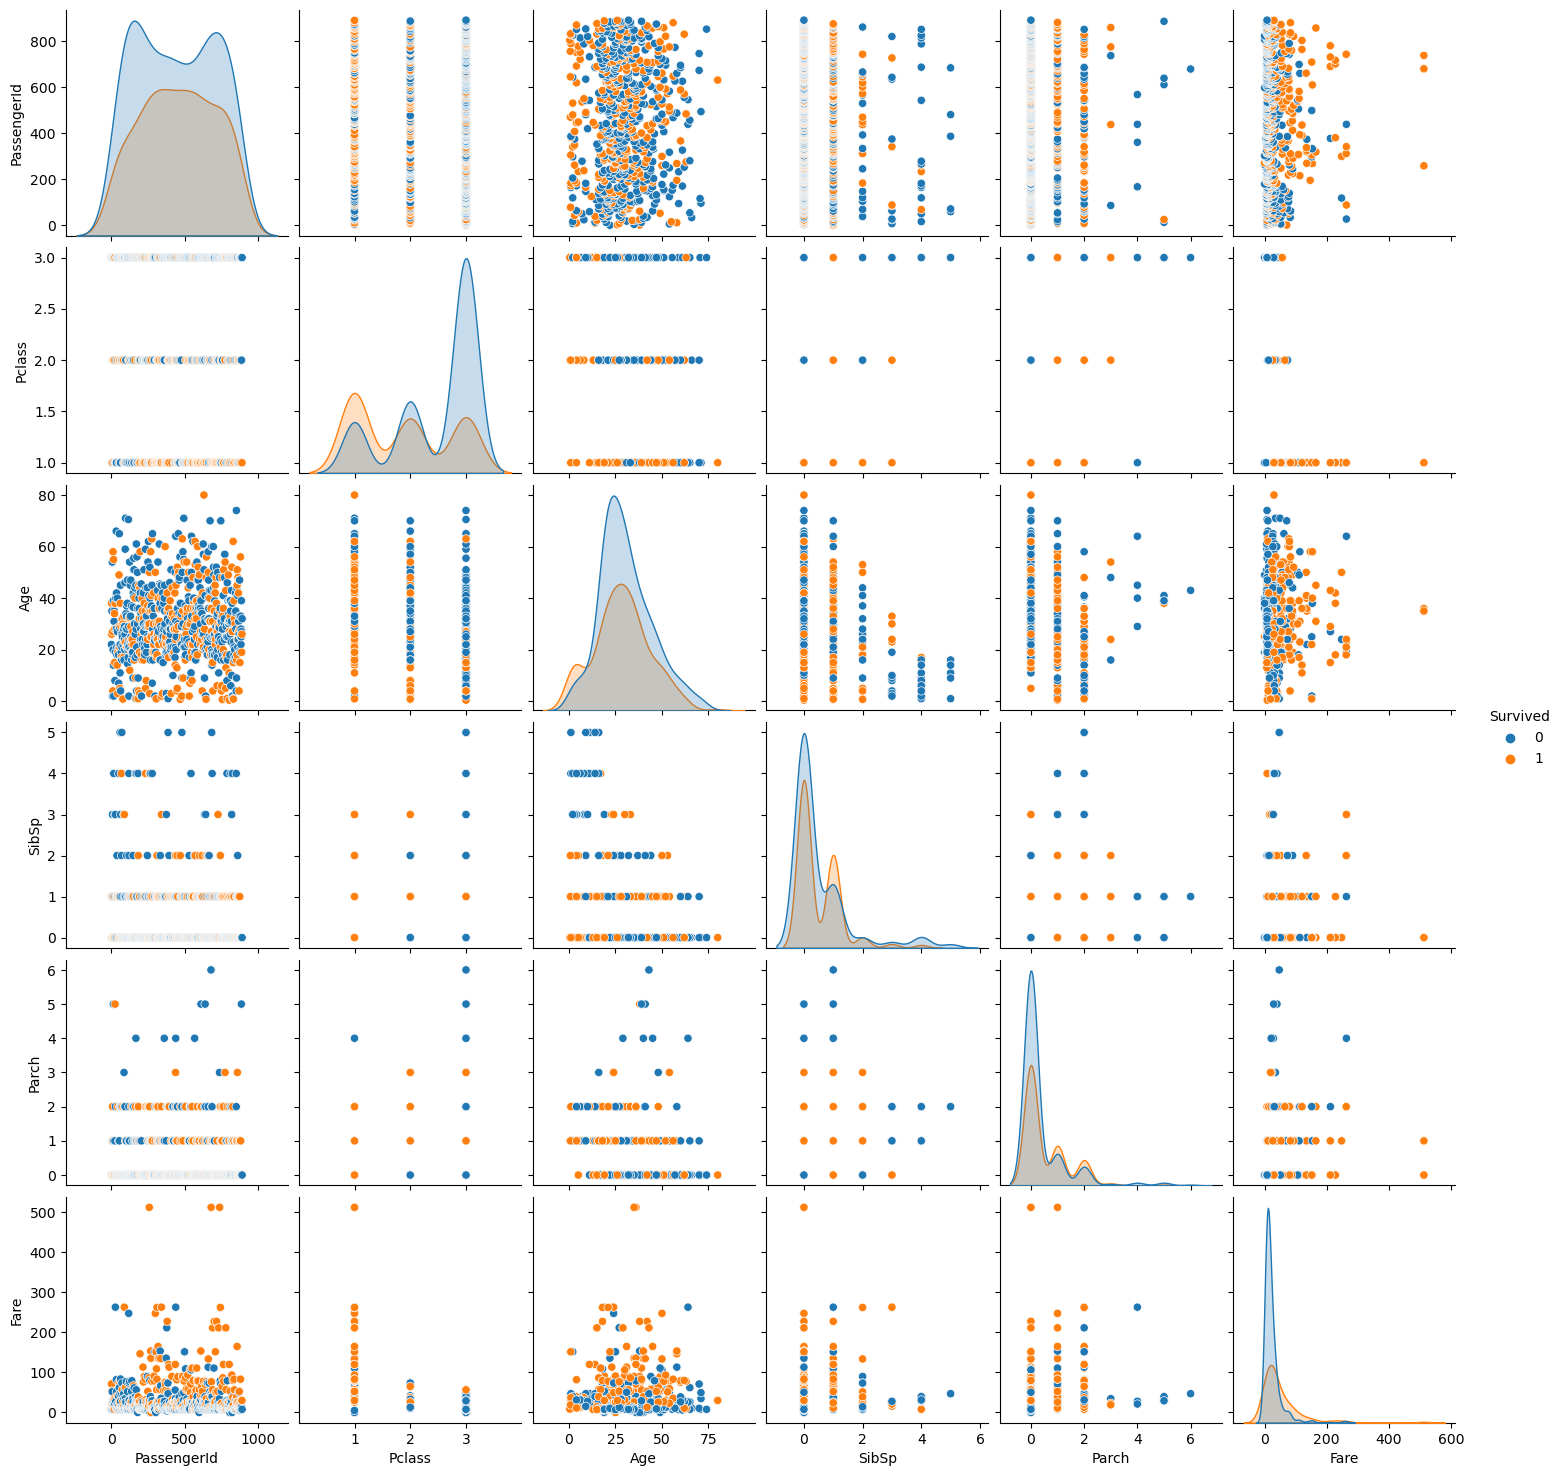

In [9]:
plt.figure(figsize=(15,10))
sns.pairplot(train_data.dropna(subset=['Age']), hue='Survived')
plt.show()

In [10]:
## imputing missing values for age column
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [11]:
## imput missing values for Embarked column
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [12]:
## Droping Cabin column as high number of missing values
train_data.drop(columns = 'Cabin', inplace=True)

In [13]:
## Encoding catgorical values in train data set
train_data = pd.get_dummies(train_data, columns =['Sex','Embarked', 'Pclass'], drop_first = True )

In [14]:
print(train_data)

     PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

      Age  SibSp  Parch    

In [15]:
## Define features
y = train_data['Survived']
X = train_data.drop(columns = ['Name','Ticket','Survived', 'PassengerId', 'Fare'])

In [16]:
## split data 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
## Standardize feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [18]:
## Model building 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
## model elvauation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

In [20]:
print(f'Accuracy : {accuracy_score(y_val, y_pred)}')

Accuracy : 0.8100558659217877


In [21]:
print(f'precision : {precision_score(y_val, y_pred)}')

precision : 0.7941176470588235


In [22]:
print(f'Recall_score : {recall_score(y_val, y_pred)}')

Recall_score : 0.7297297297297297


In [23]:
print(f'f1_score : {f1_score(y_val, y_pred)}')

f1_score : 0.7605633802816901


In [24]:
print(f'roc-acu : {roc_auc_score(y_val, y_pred)}')

roc-acu : 0.7981981981981983


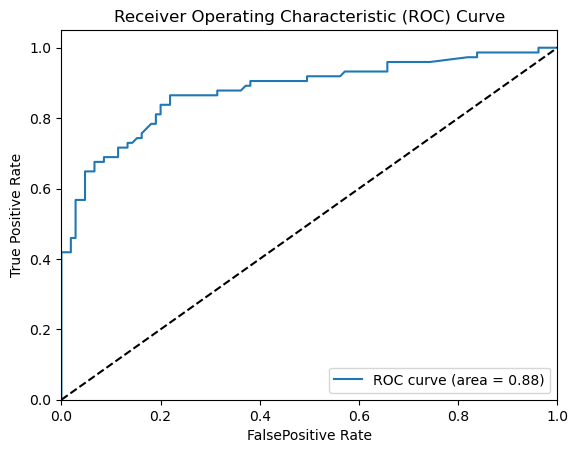

In [25]:
## Roc Curve 
fpr, tpr, thresholds  = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FalsePositive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

      Feature  Coefficient
4  Embarked_Q    -0.055293
2       Parch    -0.073704
5  Embarked_S    -0.240906
6    Pclass_2    -0.281322
1       SibSp    -0.318526
0         Age    -0.383325
7    Pclass_3    -0.985004
3    Sex_male    -1.274856


In [27]:
# Save the model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import streamlit as st
import pandas as pd
import pickle

# Load the scaler and the trained model
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('logistic_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Streamlit app
st.title('Titanic Survival Prediction')
age = st.slider('Age', 0, 80, 29)
fare = st.slider('Fare', 0, 500, 50)
sex = st.selectbox('Sex', ['male', 'female'])
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
pclass = st.selectbox('Class', [1, 2, 3])
sibsp = st.slider('SibSp', 0, 10, 0)
parch = st.slider('Parch', 0, 10, 0)

# Prepare input data
input_data = pd.DataFrame({
    'Age': [age],
    'Fare': [fare],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0],
    'Pclass_2': [1 if pclass == 2 else 0],
    'Pclass_3': [1 if pclass == 3 else 0],
}, index=[0])

# Ensure all columns match
missing_cols = set(X.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0

input_data = input_data[X.columns]  # Ensure the order of columns matches

# Standardize the input data
input_data = scaler.transform(input_data)

# Predict
survival_prob = loaded_model.predict_proba(input_data)[0][1]
st.write(f'The probability of survival is {survival_prob:.2f}')

2024-07-29 11:28:13.483 
  command:

    streamlit run C:\Users\ritee\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


 What is the difference between precision and recall?
 Ans. Precision and recall are two elvalutaion metrics used to measure performance of classifier in binary and multiclass classification problems. precision measures the accuracy of prositive preditions, while recall measures the completness of possitive predictions.

What is cross-validation, and why is it important in binary classification?
Ans. cross validation is a technic for elvalutating ML modules by traning sevral ML models on subset of avaliable data and evaluating team on complementary subset and data. Use cross validation and to detect over fitting, fail to generalize a pattern.